# Biblioteca pyodbc

1. Precisamos criar uma conexão com o banco de dados.

*texto em itálico*# Integração Python e SQL

### Objetivo

A integração do Python com o SQL permite que execute comandos SQL diretamente pelo Python no seu banco de dados. Isso vai permitir a gente pegar consultas e já importar elas para dentro de uma análise no Python automaticamente.

### O que vamos precisar

- Para aprender, vamos usar o SQL Server, umas das ferramentas de gerenciamento de banco de dados mais usadas no Mercado. (Vamos instalar gratuitamente)
- Um banco de dados para testar -> usaremos o Contoso, disponibilizado pela Microsoft gratuitamente

### No Python, o que vamos usar

- Biblioteca pyodbc -> pode ser usada com a mesma estrutura para diversos bancos de dados, como SQL Server, MySQL, Oracle, Access, IBM, etc.

### Obs Importante

- Isso não vai ser um curso de SQL, portanto não vamos trabalhar extensivamente os comandos SQL, usaremos apenas alguns para mostrar como funciona a integração das ferramentas

In [1]:
import pyodbc

dados_conexao = ("Driver={SQL Server};"
            "Server=DESKTOP-MI65117;"
            "Database=ContosoRetailDW;")

#caso precisasse de login e senha:
#dados_conexao = ("Driver={SQL Server Native Client 11.0};"
#            "Server=UKXXX00123,45600;"
#            "Database=DB01;"
#            "UID=Login;"
#            "PWD=Senha;")


conexao = pyodbc.connect(dados_conexao)
print('Conexão Bem sucedida')

Conexão Bem sucedida


2. Agora, precisamos criar o que o pyodbc chama de cursor, que é basicamente quem vai executar os nossos códigos SQL

In [2]:
cursor = conexao.cursor()

3. Agora já podemos executar nossos comandos SQL.

Temos 2 opções aqui:<br>
    1. Apenas Executar comandos SQL que vão acontecer no banco
    2. Executar o comando SQL e armazenar a consulta em uma variável no Python, como um dataframe do pandas

Vamos usar a 2ª opção por ser a mais útil e melhor para o nosso objetivo, até porque normalmente não teremos acesso de edição ao banco de dados (e devemos tomar MUITO cuidado com isso).

In [3]:
#opção 1: apenas executar um comando no banco de dados
# cursor.execute("SELECT * FROM BaseDeDados.Tabela")
# caso a operação não seja para criar uma consulta e sim um UPDATE, DELETE ou CREATE, você precisará fazer um commit
#da sua operação no banco de dados para implementar (não aconselhável se você não tem certeza que pode fazer isso)
# conexao.commit()

#opção 2: puxar uma consulta para o banco de dados com o pandas
import pandas as pd
produtos_df = pd.read_sql('SELECT * FROM ContosoRetailDW.dbo.DimProduct', conexao)
display(produtos_df)

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ProductKey,ProductLabel,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassID,ClassName,StyleID,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,0101001,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-25 08:01:12,2008-05-25 08:01:12
1,2,0101002,Contoso 512MB MP3 Player E51 Blue,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,5,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-26 08:01:12,2008-05-26 08:01:12
2,3,0101003,Contoso 1G MP3 Player E100 White,1GB flash memory and USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,7.40,14.52,2006-05-13,None,On,None,None,1,2008-05-27 08:01:12,2008-05-27 08:01:12
3,4,0101004,Contoso 2G MP3 Player E200 Silver,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,1,Economy,1,...,11.00,21.57,2006-12-16,None,On,None,None,1,2008-05-28 08:01:12,2008-05-28 08:01:12
4,5,0101005,Contoso 2G MP3 Player E200 Red,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,1,Economy,1,...,11.00,21.57,2006-12-17,None,On,None,None,1,2008-05-29 08:01:12,2008-05-29 08:01:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2513,0505026,Contoso Bluetooth Active Headphones L15 Red,"Play time up to 6 hours, talk time up to 7 hou...",33,"Contoso, Ltd",Contoso,3,Deluxe,None,...,43.07,129.99,2009-01-02,None,On,None,None,1,2007-01-01 00:00:00,2007-01-01 00:00:00
2513,2514,0505027,Contoso Bluetooth Active Headphones L15 White,"Play time up to 6 hours, talk time up to 7 hou...",33,"Contoso, Ltd",Contoso,3,Deluxe,None,...,43.07,129.99,2009-01-02,None,On,None,None,1,2007-01-01 00:00:00,2007-01-01 00:00:00
2514,2515,0505028,Contoso In-Line Coupler E180 White,"Designed for new modular, different location w...",33,"Contoso, Ltd",Contoso,1,Economy,None,...,1.71,3.35,2006-07-28,None,On,None,None,1,2007-01-01 00:00:00,2007-01-01 00:00:00
2515,2516,0505029,Contoso In-Line Coupler E180 Black,"Designed for new modular, different location w...",33,"Contoso, Ltd",Contoso,1,Economy,None,...,1.71,3.35,2006-07-28,None,On,None,None,1,2007-01-01 00:00:00,2007-01-01 00:00:00


# Desafio Python e SQL

### Nesse desafio, vamos fazer uma consulta em SQL com uma condição e fazer o tratamento das informações no Python usando o pandas

- Calcule o lucro diário da empresa 

- Tabela com as Vendas -> dbo.FactSales
- Lucro é -> Sales Amount - TotalCost - DiscountAmount
- Lembre que podemos ter mais de 1 transação por dia na tabela, então uma opção é usar o método groupby do pandas
- Sugestão para ajudar na análise é plotar um gráfico do lucro diário

In [1]:
import pyodbc
import pandas as pd

dados_conexao = ("Driver={SQL Server};"
            "Server=DESKTOP-MI65117;"
            "Database=ContosoRetailDW;")

conexao = pyodbc.connect(dados_conexao)
print('Conexão Bem sucedida')

Conexão Bem sucedida


In [2]:
vendas_df = pd.read_sql('SELECT * FROM ContosoRetailDW.dbo.FactSales', conexao)
display(vendas_df)

#o banco de dados é enrome, por isso esse código demrora uns 3 min pra rodar

C:\Users\User\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750,1,2010-01-01,2010-01-01
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000,1,2010-01-01,2010-01-01
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830,1,2010-01-01,2010-01-01
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750,1,2010-01-01,2010-01-01


In [5]:
print(vendas_df['DateKey'].min())
print(vendas_df['DateKey'].max())
# basicamente são 3 anos, que tem pouco meno de 1200 dias. conclui-se que a tabela com 3milhoes de itens, tem dias repetidos.


2007-01-01 00:00:00
2009-12-31 00:00:00


In [7]:
#criando a coluna de lucro para ser analisada.

vendas_df['Lucro'] = vendas_df['SalesAmount'] - vendas_df['DiscountAmount'] - vendas_df['TotalCost']
display(vendas_df)

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate,Lucro
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01,776.40
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01,37.01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01,1685.73
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01,1133.20
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01,6476.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750,1,2010-01-01,2010-01-01,2.35
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000,1,2010-01-01,2010-01-01,8008.08
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830,1,2010-01-01,2010-01-01,518.32
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750,1,2010-01-01,2010-01-01,13123.08


In [11]:
# agrupando a tabela vinculada aos dias 

vendas_diarias_df = vendas_df.groupby(['DateKey']).sum()
display(vendas_diarias_df)

#1096 linhas , referente a 365 dias * 3 anos = 1096 dias.
# foi agrupado com a soma (.sum())

,SalesKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,Lucro
DateKey,,,,,,,,,,,,,,,,,
2007-01-01,6123323046,5785,699835,4672619,15995,3605,366532.85,836949.226,37237,533,115502.510,8402,196886.0684,3667018.43,8.310498e+06,3605,4.446594e+06
2007-01-02,6181606765,5803,693313,4682125,16094,3630,377069.54,853070.198,38193,510,124318.940,8231,204971.8391,3697809.22,8.326143e+06,3630,4.423362e+06
2007-01-03,6183627173,5698,663016,4659679,15617,3559,371929.21,843061.284,38671,594,124771.940,8386,198631.5069,3695293.94,8.409919e+06,3559,4.515993e+06
2007-01-04,5931798811,5593,658539,4432500,15599,3469,368132.73,842069.948,36968,509,126866.100,8286,193369.2363,3591397.68,8.231880e+06,3469,4.447113e+06
2007-01-05,5855827049,5578,678737,4562287,15622,3485,369473.78,840852.896,36237,561,141977.748,8228,199059.7830,3552350.93,8.089676e+06,3485,4.338266e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,4119901460,4271,519613,3019797,56905,2429,358206.68,856959.978,69757,310,104312.270,5606,367725.2467,4774254.59,1.058082e+07,2429,5.438840e+06
2009-12-28,4182642550,4296,519793,2990711,56980,2431,365180.75,878025.398,56515,409,144960.858,5638,368191.4994,4609967.37,1.025124e+07,2431,5.273078e+06
2009-12-29,4140868648,4272,521652,2955146,57482,2452,378939.27,919297.290,60455,385,156741.590,5718,379821.2060,4760565.92,1.066394e+07,2452,5.523555e+06


In [13]:
#resumindo a informação

display(vendas_diarias_df['Lucro'])

DateKey
2007-01-01    4.446594e+06
2007-01-02    4.423362e+06
2007-01-03    4.515993e+06
2007-01-04    4.447113e+06
2007-01-05    4.338266e+06
                  ...     
2009-12-27    5.438840e+06
2009-12-28    5.273078e+06
2009-12-29    5.523555e+06
2009-12-30    5.399371e+06
2009-12-31    5.513426e+06
Name: Lucro, Length: 1096, dtype: float64

<AxesSubplot:xlabel='DateKey'>

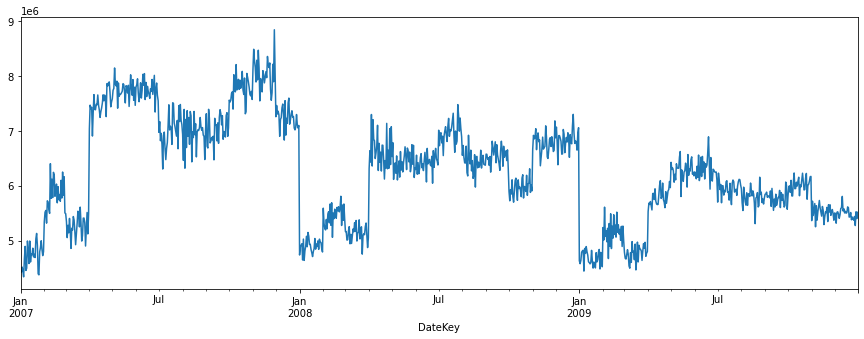

In [28]:
vendas_diarias_df['Lucro'].plot(figsize=(15,5))

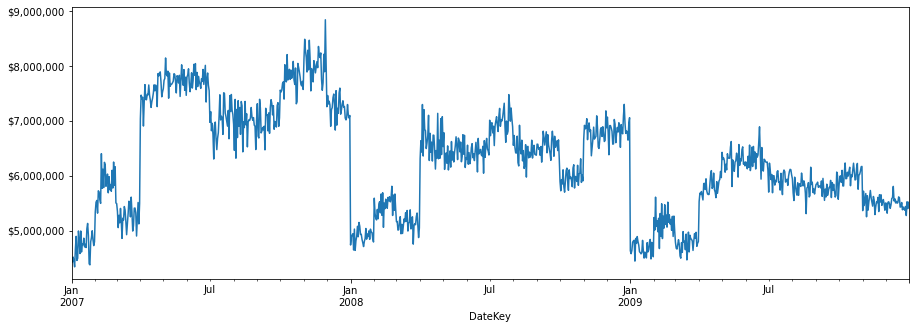

In [30]:
import matplotlib
import matplotlib.pyplot as plt

grafico = vendas_diarias_df['Lucro'].plot(figsize=(15,5))
grafico.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()